# **Maestría en Analítica de Negocios - MBD**

## **Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad en Equipos

### **Problema de asignación de créditos: South German Dataset.**


## **Nombres y matrículas de los integrantes del equipo: Eduardo Cárdenas Cruz A01451720**

# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

## **Ejercicio 1**

In [105]:
# Aquí puedes incluir alguna otra librería que requieras durante esta actividad:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek


In [6]:
# Cargamos los datos:

df = pd.read_csv("/Users/lalo/Downloads/south+german+credit/SouthGermanCredit.asc",sep=' ')
print(df.shape)
df.head(3)

(1000, 21)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


In [10]:
# Renombra los nombres de las columnas del alemán al inglés y desplegamos de
# nuevo el DataFrame para ver el resultado obtenido:

# ************* Inlcuye aquí tu código:*****************************
columnas_ingles = {'laufkont':'status', 'laufzeit':'duration', 'moral': 'credit_history', 'verw': 'purpose', 'hoehe': 'amount',
                  'sparkont': 'savings', 'beszeit': 'employment_duration', 'rate': 'installment_rate',
                 'famges': 'personal_status_sex', 'buerge': 'other_debtors', 'wohnzeit': 'present_residence',
                 'verm': 'property', 'alter': 'age', 'weitkred': 'other_installment_plans',
                   'wohn': 'housing', 'bishkred': 'number_credits', 'beruf': 'job', 'pers': 'people_liable',
                  'telef': 'telephone', 'gastarb': 'foreign_worker', 'kredit': 'credit_risk'}
df = df.rename(columns = columnas_ingles)
None   # NOTA: Tanto aquí como en lo sucesivo, "None" puede indicar una o varias líneas de código.

# *********** Aquí termina la sección de agregar código *************

df.head().T

,0,1,2,3,4
status,1,1,2,1,1
duration,18,9,12,12,12
credit_history,4,4,2,4,4
purpose,2,0,9,0,0
amount,1049,2799,841,2122,2171
savings,1,1,2,1,1
employment_duration,2,3,4,3,3
installment_rate,4,2,2,3,4
personal_status_sex,2,3,2,3,3
other_debtors,1,1,1,1,1


In [11]:
# Los datos originales tienen en la variable de salida "credit_risk" a la clase negativa (buen cliente) con el valor de 1
# y a la clase de interés positiva (mal cliente) con el valor de 0.
# Como las técnicas de balanceo y en general en lo problemas de Machine Learning a la clase de interés y generalmente
# la clase minoritaria se le etiqueta como 1. Entonces invirtamos dichos regitros.
# Recuerda que esta base de datos es de principios de los años 90s, donde la estandarización de los datos todavía
# no estaba estandarizada y cada quien etiquetaba los datos a su mejor parecer.

df['credit_risk'] = df['credit_risk'].map({0:1, 1:0})
print(df['credit_risk'].value_counts())

1    700
0    300
Name: credit_risk, dtype: int64


### ++++++++ Inicia la sección de agregar texto: +++++++++++

Se puede apreciar que las clases están desbalanceadas. De un total de 1,000 registros. 70% corresponde a la clase de buen cliente (0) y el 30% restante a la clase de mal cliente (1)

### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 2**

In [74]:
# Realiza una partición de 70-15-15 en entrenamiento, validación y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# ************* Inlcuye aquí tu código:*****************************
X = df.drop(df[['credit_risk']], axis=1)
Y = df['credit_risk']

Xtrain, Xtemp, ytrain, ytemp = train_test_split(X, Y, test_size=0.3, random_state=42)
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.5, random_state=42)

# *********** Aquí termina la sección de agregar código *************

# Mostremos las dimensiones de la partición generada:
print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

(700, 20) (700,)
(150, 20) (150,)
(150, 20) (150,)


## **Ejercicio 3**

### **Describe a continuación la información de cada variable: su descripción, el tipo de variable y para el caso de las categóricas, el total de niveles que tiene.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

### **Variables Categóricas:**

*   Status: El estado de la cuenta del deudor en el banco. Tiene 4 niveles (1 a 4).
*   Credit history: El historial de contratos de créditos anteriores o actuales. Tiene 5 niveles (0 a 4).
*   Purpose: La razón del crédito. Tiene 11 niveles (0 a 10).
*   Savings: Ahorro total del deudor. Tiene 5 niveles (1 a 5).
*   Personal status sex: la información del sexo y el estado marital. Tiene 4 niveles (1 a 4).
*   Other debtors: Otro deudor para el crédito. Tiene 3 niveles (1 a 3).
*   Other installment plans: Cualquier carga de crédito/cuotas que no sea el banco otorgante del crédito. Tiene 3 niveles (1 a 3).
*   Housing: Estado de la residencia actual. Tiene 3 niveles (1 a 3).
*   Telephone: El estado del telefono fijo registrado a nombre del deudor. Es una variable binaria (1 o 2).
*   Foreign worker: Indicador si el trabajador es extranjero o no. Es una variable binaria (1 o 2).
*   Credit risk: Bueno o malo. Es una variable binaria (1 o 0).

### **Variables Ordinales (y/o discretizadas):**

*   Employment duration: La duración de del empleo del deudor en su actual organización.
*   Installment rate: Las cuotas de crédito de los ingresos desechables del deudor.
*   Present residence: La duración que ha vivido en su residencia actual.
*   Property: El ranking de la propiedad de los deudores en orden ascendente.
*   Number credits: El historial completo de los créditos tomados.
*   Job: El nivel del trabajo del deudor.

### **Variables Numéricas:**

*   Duration: La duración del crédito en meses.
*   Amount: El monto total del crédito.
*   Age: La edad del deudor.
*   People liable: El número total de compañeros que dependen financieramente del deudor. 

### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 4**

In [13]:
# Define una lista que incluya solamente las variables categóricas de
# entrada, de acuerdo a la selección que hiciste en el ejercicio anterior.
# La llamaremos “lista_Xcat” y la usaremos para desplegar los niveles de
# cada una de estas variables:

# ************* Inlcuye aquí tu código:*****************************

lista_Xcat = ['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex', 'other_debtors', 'other_installment_plans',
             'housing', 'telephone', 'foreign_worker']

# *********** Aquí termina la sección de agregar código *************


for w in lista_Xcat:
  print(Xtrain[w].value_counts().values)
  print(Xtrain[w].value_counts() / Xtrain.shape[0])
  print('\n')

[279 190 188  43]
4    0.398571
1    0.271429
2    0.268571
3    0.061429
Name: status, dtype: float64


[371 204  64  34  27]
2    0.530000
4    0.291429
3    0.091429
1    0.048571
0    0.038571
Name: credit_history, dtype: float64


[199 159 114  82  70  32  18  10   9   7]
3     0.284286
0     0.227143
2     0.162857
1     0.117143
9     0.100000
6     0.045714
5     0.025714
10    0.014286
4     0.012857
8     0.010000
Name: purpose, dtype: float64


[428 129  73  42  28]
1    0.611429
5    0.184286
2    0.104286
3    0.060000
4    0.040000
Name: savings, dtype: float64


[394 205  60  41]
3    0.562857
2    0.292857
4    0.085714
1    0.058571
Name: personal_status_sex, dtype: float64


[638  34  28]
1    0.911429
3    0.048571
2    0.040000
Name: other_debtors, dtype: float64


[571  95  34]
3    0.815714
1    0.135714
2    0.048571
Name: other_installment_plans, dtype: float64


[505 114  81]
2    0.721429
1    0.162857
3    0.115714
Name: housing, dtype: float64


[398 302]
1 

## **Ejercicio 5**

In [29]:
df.loc[:, lista_Xcat]

,status,credit_history,purpose,savings,personal_status_sex,other_debtors,other_installment_plans,housing,telephone,foreign_worker
0,1,4,2,1,2,1,3,1,1,2
1,1,4,0,1,3,1,3,1,1,2
2,2,2,9,2,2,1,3,1,1,2
3,1,4,0,1,3,1,3,1,1,1
4,1,4,0,1,3,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...
995,1,2,3,1,3,1,3,1,1,2
996,1,2,0,1,3,2,3,2,1,2
997,4,4,0,5,3,1,3,3,2,2
998,2,2,3,5,3,1,3,2,2,2


In [75]:
# De acuerdo con la información de las variables categóricas desplegada en el
# ejercicio anterior, identifica las variables que tienen niveles abajo del 3%
# de información. Con cada una de estas variables identificadas utiliza la
# función map() de Python para agrupar dichos niveles en un nuevo nivel, de
# manera que se tenga ahora una cantidad mayor o igual al 3% de información:


# ************* Inlcuye aquí tu código:*****************************

frecuencia_train = Xtrain.loc[:, lista_Xcat].apply(lambda x: x.value_counts(normalize=True))

niveles_menos_3_por_ciento = frecuencia_train.columns[frecuencia_train.min() < 0.03]

for col in niveles_menos_3_por_ciento:
    niveles_con_poca_informacion = frecuencia_train[col][frecuencia_train[col] < 0.03].index
    Xtrain[col] = Xtrain[col].map(lambda x: 11 if x in niveles_con_poca_informacion else x)

print(Xtrain)

# *********** Aquí termina la sección de agregar código *************

     status  duration  credit_history  purpose  amount  savings  \
541       2        48               2        3    3979        5   
440       4        21               4        2    2288        1   
482       4        24               3        9    3863        1   
422       2        16               4        0    1175        1   
778       2        18               4        3    1245        1   
..      ...       ...             ...      ...     ...      ...   
106       4        12               4        9    1412        1   
270       4         6               2        1    1236        3   
860       4        48               2        9    3914        5   
435       4         7               3        3     846        5   
102       2        24               3        9    4712        5   

     employment_duration  installment_rate  personal_status_sex  \
541                    4                 4                    3   
440                    2                 4                   

## **Ejercicio 6**

In [33]:
# Solamente para el o los factores que modificaste en el ejercicio anterior
# despliega la cantidad porcentual de información que tienes ahora en cada
# nivel, para comprobar que efectivamente todos quedaron arriba del 3%:


# ************* Inlcuye aquí tu código:*****************************

for w in lista_Xcat:
  print(Xtrain[w].value_counts().values)
  print(Xtrain[w].value_counts() / Xtrain.shape[0])
  print('\n')

# *********** Aquí termina la sección de agregar código *************

[279 190 188  43]
4    0.398571
1    0.271429
2    0.268571
3    0.061429
Name: status, dtype: float64


[371 204  64  34  27]
2    0.530000
4    0.291429
3    0.091429
1    0.048571
0    0.038571
Name: credit_history, dtype: float64


[199 159 114  82  70  44  32]
3       0.284286
0       0.227143
2       0.162857
1       0.117143
9       0.100000
Otro    0.062857
6       0.045714
Name: purpose, dtype: float64


[428 129  73  42  28]
1    0.611429
5    0.184286
2    0.104286
3    0.060000
4    0.040000
Name: savings, dtype: float64


[394 205  60  41]
3    0.562857
2    0.292857
4    0.085714
1    0.058571
Name: personal_status_sex, dtype: float64


[638  34  28]
1    0.911429
3    0.048571
2    0.040000
Name: other_debtors, dtype: float64


[571  95  34]
3    0.815714
1    0.135714
2    0.048571
Name: other_installment_plans, dtype: float64


[505 114  81]
2    0.721429
1    0.162857
3    0.115714
Name: housing, dtype: float64


[398 302]
1    0.568571
2    0.431429
Name: telephone, 

## **Ejercicio 7**

### **Justifica el procedimiento realizado en el ejercicio 5, En particular, indica en qué puede ayudar al problema y cuáles podrían ser sus inconvenientes:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Como ventajas se reduce la dimensionalidad al agrupar niveles poco frecuentes en una sola categoría y mejora la calidad del modelo al reducir el ruido en los datos.

Como inconvenientes hay se pierde información sobre las diferencias entre los niveles y podría introducir sesgos en el análisis o en los modelos.

### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 8**

### **Para evitar el filtrado de información realiza ahora la misma transformación del ejercicio 5 a la(s) misma(s) variable(s) en los conjuntos de validación y de prueba.**

In [79]:
frecuencia_val = Xval.loc[:, lista_Xcat].apply(lambda x: x.value_counts(normalize=True))

niveles_menos_3_por_ciento = frecuencia_val.columns[frecuencia_val.min() < 0.03]

for col in niveles_menos_3_por_ciento:
    niveles_con_poca_informacion = frecuencia_val[col][frecuencia_val[col] < 0.03].index
    Xval[col] = Xval[col].map(lambda x: 11 if x in niveles_con_poca_informacion else x)

frecuencia_test = Xtest.loc[:, lista_Xcat].apply(lambda x: x.value_counts(normalize=True))

niveles_menos_3_por_ciento = frecuencia_test.columns[frecuencia_test.min() < 0.03]

for col in niveles_menos_3_por_ciento:
    niveles_con_poca_informacion = frecuencia_test[col][frecuencia_test[col] < 0.03].index
    Xtest[col] = Xtest[col].map(lambda x: 11 if x in niveles_con_poca_informacion else x)

for w in lista_Xcat:
  print(Xval[w].value_counts().values)
  print(Xval[w].value_counts() / Xval.shape[0])
  print('\n')

for w in lista_Xcat:
  print(Xtest[w].value_counts().values)
  print(Xtest[w].value_counts() / Xtest.shape[0])
  print('\n')

[54 47 40  9]
4    0.360000
1    0.313333
2    0.266667
3    0.060000
Name: status, dtype: float64


[77 45 13  8  7]
2    0.513333
4    0.300000
3    0.086667
0    0.053333
1    0.046667
Name: credit_history, dtype: float64


[39 35 35 13 11  9  8]
2     0.260000
3     0.233333
0     0.233333
9     0.086667
1     0.073333
6     0.060000
11    0.053333
Name: purpose, dtype: float64


[100  21  13   9   7]
1    0.666667
5    0.140000
2    0.086667
4    0.060000
3    0.046667
Name: savings, dtype: float64


[79 46 20  5]
3    0.526667
2    0.306667
4    0.133333
1    0.033333
Name: personal_status_sex, dtype: float64


[133  10   7]
1    0.886667
3    0.066667
2    0.046667
Name: other_debtors, dtype: float64


[125  18   7]
3    0.833333
1    0.120000
2    0.046667
Name: other_installment_plans, dtype: float64


[100  36  14]
2    0.666667
1    0.240000
3    0.093333
Name: housing, dtype: float64


[103  47]
1    0.686667
2    0.313333
Name: telephone, dtype: float64


[138  12]
2    0.

## **Ejercicio 9**

In [47]:
#	Define una lista que incluya solamente las variables de entrada que identificaste
# como ordinales en el ejercicio 3 y otra para las numéricas. La llamaremos
# “lista_Xord” y "lista_Xnum" y la usaremos para visualizar su información:

# ************* Inlcuye aquí tu código:*****************************

lista_Xord = ['employment_duration', 'installment_rate', 'present_residence', 'property', 'number_credits', 'job']

lista_Xnum = ['duration', 'amount', 'age', 'people_liable']

# *********** Aquí termina la sección de agregar código *************

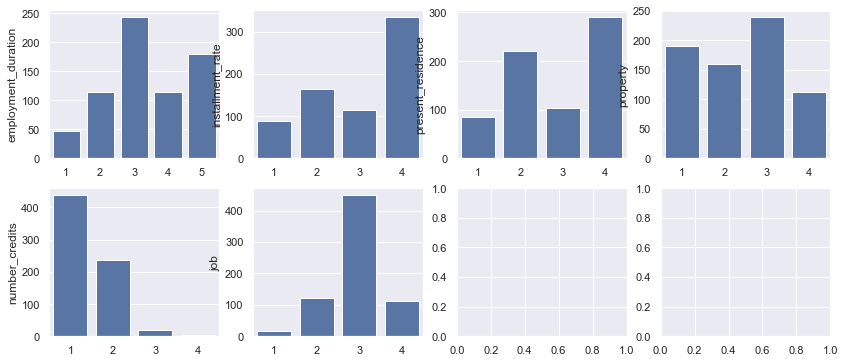

In [80]:
# Visualizamos la información de las variables ordinales en gráficos de barra
# a partir de la lista que definiste arribay solo del conjunto de
# entrenamiento para evitar el filtrado de información:

sns.set(rc={'figure.figsize':(14,6)})
fig, axes = plt.subplots(2,4)
for k,w in enumerate(lista_Xord):
  plt.subplot(2,4,k+1)
  ax = sns.barplot(Xtrain[w].value_counts())
plt.show()

# NOTA: No tienen que ser 8 los gráficos, si definiste como ordinales una
#       cantidad menor, pueden aparecer algunos de los nichos sin gráfico.
#       Recuerda que algunas variables pueden considerarse de un tipo u otro
#       de acuerdo al criterio del analista.

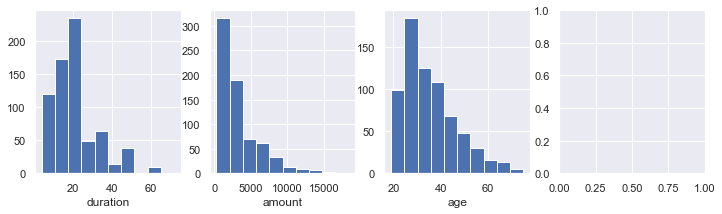

In [45]:
# Visualizamos la información de las variables numéricas en histogramas
# a partir de la lista que definiste arriba, y solo del conjunto de
# entrenamiento para evitar el filtrado de información:

sns.set(rc={'figure.figsize':(12,3)})
fig, axes = plt.subplots(1,4)
tmp = Xtrain[lista_Xnum]
for k in range(0,3):
  plt.subplot(1,4,k+1)
  plt.hist(tmp[tmp.columns[k]])
  xlabels = list(tmp.value_counts().index)
  plt.xlabel(tmp.columns[k])
plt.show()

# NOTA: No tienen que ser 4 los gráficos, si definiste como numéricas una
#       cantidad menor, pueden aparecer algunos de los nichos sin gráfico.
#       Recuerda que algunas variables pueden considerarse de un tipo u otro
#       de acuerdo al criterio del analista.

### **¿Qué conclusiones puedes obtener de estos gráficos?**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Se puede observar que las variables ordinales y númericas no siguen una distribución normal. En especial las variables númercias que presentan una asimetría importante hacia la derecha.

### ++++++++ Termina la sección de agregar texto. +++++++++++


# **Ejercicio 10**

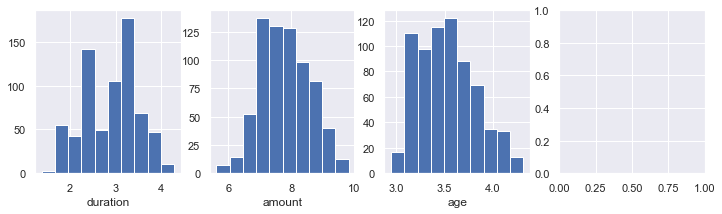

In [81]:
# Como primera aproximación encuentra qué transformación ajusta mejor los
# datos para corregir el sesgo de las variables numéricas. Deberás seleccionar
# una entre las funciones de Numpy de logaritmo, log(), o alguna de las
# potencias, power(), únicamente.
# Por el momento no aplicaremos una transformación para escalar los datos.


# ************* Inlcuye aquí tu código:*****************************

tmpTransf = np.log(tmp)

# *********** Aquí termina la sección de agregar código *************



sns.set(rc={'figure.figsize':(12,3)})
fig, axes = plt.subplots(1,4)

for k in range(0,3):
  plt.subplot(1,4,k+1)
  plt.hist(tmpTransf[tmpTransf.columns[k]] )  # graficamos cada columna de datos transformada
  xlabels = list(tmpTransf.value_counts().index)
  plt.xlabel(tmpTransf.columns[k])
plt.show()

# NOTA: No tienen que ser 4 los gráficos, si definiste como numéricas una
#       cantidad menor, pueden aparecer algunos de los nichos sin gráfico.
#       Recuerda que algunas variables pueden considerarse de un tipo u otro
#       de acuerdo al criterio del analista.

### **¿Sí conviene aplicar alguna de estas transformaciones? Justifica tu respuesta.**


### ++++++++ Inicia la sección de agregar texto: +++++++++++

Se puede apreciar que la transformación logaritmica mejoro la distribución de las variables númericas. Ahora la distribución de estas variables es normal. 

### ++++++++ Termina la sección de agregar texto. +++++++++++

# **Parte II : Entrenamiento de los modelos**

# **Ejercicio 11**

In [82]:
# Conjuntamos todas las transformaciones que aplicaremos a nuestras variables
# usando la clase Pipeline y el ColumnTransformer de sklearn, , donde las
# variables ordinales las dejaremos sin transformar.



# ************* Inlcuye aquí tu código:**************************************


# a) A las variables numéricas, aplica la transformación que seleccionaste en el ejercicio 10:

num_pipe = Pipeline(steps=[
    ('log_transformer', FunctionTransformer(np.log1p))])

num_pipe_nombres = lista_Xnum



# b) A las variables categóricas aplica la transformación OneHotEncoder() de
#    sklearn con los argumentos que consideres adecuados.
#    Justifica la selección de dichos argumentos:

cat_pipe = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

cat_pipe_nombres = lista_Xcat


# *********** Aquí termina la sección de agregar código **********************




# Conjuntemos las transformaciones de todo tipo de variable y
# dejaremos sin procesar las ordinales, que ya están de manera adecuada, en general.


columnasTransformer = ColumnTransformer(transformers = [('num_transf', num_pipe, num_pipe_nombres),
                                                        ('cat_transf', cat_pipe, cat_pipe_nombres)
                                                        ],
                                        remainder='passthrough')

In [84]:
# Veamos cuántas variables de más se están agragando por la transformación OneHotEncoder:

Xtmp = Xtrain.copy()
tmp = columnasTransformer.fit_transform(Xtmp)
print("Dimensión antes de las transformaciones:", Xtmp.shape)
print("Dimensión después de las transformaciones:", tmp.shape)

Dimensión antes de las transformaciones: (700, 20)
Dimensión después de las transformaciones: (700, 48)


In [85]:
# Como se va a utilizar Validación-Cruzada, concatenamos los conjuntos de entrenamiento
# y validación en uno nuevo conjunto aumentado que llamaremos "trainval":

Xtrainval = pd.concat([Xtrain, Xval], axis=0)
ytrainval = pd.concat([ytrain, yval], axis=0)


print('Dimensiones de los nuevos datos concatenados sin transformar de entrenamiento de las variables de entrada y salida, respectivamente:\n',
      Xtrainval.shape, ytrainval.shape)

Dimensiones de los nuevos datos concatenados sin transformar de entrenamiento de las variables de entrada y salida, respectivamente:
 (850, 20) (850,)


# **Ejercicio 12**

### **Con respecto al caso de un modelo subentrenado y en relación a la información de nuestro problema, responde la siguiente pregunta: ¿debajo de qué valor porcentual podemos decir que nuestro modelo estará subentrenado?**


### ++++++++ Inicia la sección de agregar texto: +++++++++++

Si el modelo tiene un valor menor al 3%, significa que no está aprendiendo lo suficiente de los datos de entrenamiento y puede mejorar.

### ++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 13**

In [92]:
# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.
# Por el momento todas tienen sus argumentos predeterminados, pero deberás
# ajustarlos de manera que todos los modelos converjan durante el entrenamiento
# y puedas comparar cuál o cuáles de ellos son los mejores modelos.Verifica
# además de que no queden subenetrenados o sobreentrenados con respecto a la
# métrica de la Exactitud (Accuracy).
# Te recomiendo que en todos aquellos modelos que tengan la opción
# del "random_state", lo utilices. Esto ayudará a que la variabilidad que se
# observe sea en lo posible, debida solamente al ajuste que estemos realizando
# en algún hiperparámetro y no por el proceso aleatorio en sí del entrenamiento.
# Consulta en dado caso la documentación de cada modelo para la mejor
# comprensión de los hiperparámetros que desees ajustar.

def mis_modelos():
  modelos, nombres = list(), list()


  # ************* Inlcuye aquí tu código:**************************
  #

  # Regresión Logística:
  modelos.append(LogisticRegression(random_state = 42))
  nombres.append('LR')


  # k-Vecinos más Cercanos:
  modelos.append(KNeighborsClassifier())
  nombres.append('kNN')


  # Árbol de decisiones:
  modelos.append(DecisionTreeClassifier(random_state = 42))
  nombres.append('DTree')


  # Bosque Aleatorio:
  modelos.append(RandomForestClassifier(random_state = 42))
  nombres.append('RF')


  # XGBoosting:
  modelos.append(XGBClassifier(random_state = 42))
  nombres.append('XGBoost')


  # Red neuronal de Perceptrón Multicapa:
  modelos.append(MLPClassifier(random_state = 42))
  nombres.append('MLP')


  # Máquina de Vectores de Soporte:
  modelos.append(SVC(random_state = 42))
  nombres.append('SVM')

  # *********** Aquí termina la sección de agregar código *************


  return modelos, nombres





# Entrenamos cada uno de los modelos y desplegamos la métricas de Train y Val.
# NOTA: Observa que el método de Validación-Cruzada llama a los resultados
#       del conjunto de validación como "test":

modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=5)

  # Definimos las métricas que desamos recuperar:
  mismetricas = ['accuracy','precision','recall','f1','roc_auc']

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelo para análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.nanmean(scores[k]),np.nanstd(scores[k])))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

>> LR
	 test_accuracy 0.755 (0.027)
	 train_accuracy 0.787 (0.005)
	 test_precision 0.795 (0.020)
	 train_precision 0.816 (0.005)
	 test_recall 0.878 (0.043)
	 train_recall 0.898 (0.004)
	 test_f1 0.833 (0.021)
	 train_f1 0.855 (0.003)
	 test_roc_auc 0.789 (0.038)
	 train_roc_auc 0.834 (0.008)
>> kNN
	 test_accuracy 0.710 (0.021)
	 train_accuracy 0.798 (0.009)
	 test_precision 0.754 (0.016)
	 train_precision 0.810 (0.007)
	 test_recall 0.870 (0.036)
	 train_recall 0.928 (0.007)
	 test_f1 0.807 (0.016)
	 train_f1 0.865 (0.006)
	 test_roc_auc 0.673 (0.035)
	 train_roc_auc 0.855 (0.008)
>> DTree
	 test_accuracy 0.682 (0.030)
	 train_accuracy 1.000 (0.000)
	 test_precision 0.786 (0.031)
	 train_precision 1.000 (0.000)
	 test_recall 0.750 (0.039)
	 train_recall 1.000 (0.000)
	 test_f1 0.767 (0.023)
	 train_f1 1.000 (0.000)
	 test_roc_auc 0.637 (0.041)
	 train_roc_auc 1.000 (0.000)
>> RF
	 test_accuracy 0.757 (0.036)
	 train_accuracy 1.000 (0.000)
	 test_precision 0.779 (0.030)
	 train_preci

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

>> MLP
	 test_accuracy 0.741 (0.032)
	 train_accuracy 0.906 (0.011)
	 test_precision 0.793 (0.024)
	 train_precision 0.912 (0.015)
	 test_recall 0.852 (0.046)
	 train_recall 0.957 (0.009)
	 test_f1 0.821 (0.025)
	 train_f1 0.934 (0.007)
	 test_roc_auc 0.762 (0.035)
	 train_roc_auc 0.961 (0.007)
>> SVM
	 test_accuracy 0.711 (0.012)
	 train_accuracy 0.719 (0.015)
	 test_precision 0.708 (0.010)
	 train_precision 0.713 (0.011)
	 test_recall 0.998 (0.005)
	 train_recall 1.000 (0.001)
	 test_f1 0.828 (0.006)
	 train_f1 0.832 (0.007)
	 test_roc_auc 0.784 (0.032)
	 train_roc_auc 0.830 (0.007)


# **Ejercicio 14**

### **De acuerdo a la información del problema, se tiene una matriz de costo que pondera diferente los Falsos Positivos y los Falsos Negativos.**

### **De acuerdo a la información de dicha matriz de costo, contesta las siguientes preguntas:**



### ++++++++ Inicia la sección de agregar texto: +++++++++++


*   a.	¿Qué error se considera que es el más costoso por parte del banco? ¿FP o FN? Justifica tu respuesta.

Los falsos negativos son los más costosos. Ya que el otorgarle un crédito a alguien que no lo puede pagar puede caer el banco en perdidas financieras, costos de recuperación e impacto en su reputación.

*   b.	¿Cuál o cuáles sería entonces la métrica o métricas a considerar como más importantes?

Accurancy y recall son las 2 metrícas más importantes a considerar para minimizar los falsos negativos.

### ++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 15**

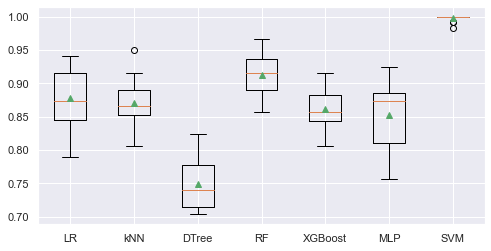

In [95]:
# Obtener un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos
# y los resultados de los conjuntos de validación, con respecto a la métrica que
# consideraste más importante en el ejercicio anterior. Para ello proporciona el
# nombre (string) de la métrica del conjunto de validación que consideraste más
# importante en el ejercicio anterior.

# ************* Inlcuye aquí tu código:**************************

str_mejor_metrica = 'test_recall'

# *********** Aquí termina la sección de agregar código *************



sns.set(rc={'figure.figsize':(8,4)})
databox = [resultados[j][str_mejor_metrica] for j in range(len(resultados))]


plt.boxplot(databox, labels=nombres, showmeans=True)
plt.show()


# **Ejercicio 16**

In [102]:
# A partir de los mejores hiperparámetros obtenidos en el ejercicio anterior,
# selecciona el modelo de balanceo que consideres da el mejor desempeño.
# Deberás seleccionar entre el SMOTE, TomekLinks y SMOTEENN de ImbalancedLearn.
# Prueba cada uno de estos métodos de muestreo y/o submuestreo para que veas el
# desempeño de cada uno de ellos, pero al final solamente debes dejar en tu
# código el que consideraste que te dio el mejor desempeño con respecto a la
# métrica que seleccionaste en el ejercicio 14.



# ************* Inlcuye aquí tu código:**************************

metodo_underoversampling = SMOTEENN(random_state=42)
Xtv_uosamp, ytv_uosamp = metodo_underoversampling.fit_resample(Xtrain, ytrain)

# *********** Aquí termina la sección de agregar código *************




modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,
                                 random_state=5
                                 )


  # Definimos las métricas que desamos recuperar:
  mismetricas = ['accuracy','precision','recall','f1','roc_auc']

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtv_uosamp,
                          ytv_uosamp,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelo para análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

>> LR
	 test_accuracy 0.843 (0.054)
	 train_accuracy 0.896 (0.014)
	 test_precision 0.821 (0.078)
	 train_precision 0.898 (0.021)
	 test_recall 0.729 (0.120)
	 train_recall 0.804 (0.026)
	 test_f1 0.767 (0.089)
	 train_f1 0.848 (0.022)
	 test_roc_auc 0.912 (0.039)
	 train_roc_auc 0.966 (0.005)
>> kNN
	 test_accuracy 0.817 (0.060)
	 train_accuracy 0.883 (0.013)
	 test_precision 0.843 (0.109)
	 train_precision 0.933 (0.017)
	 test_recall 0.613 (0.126)
	 train_recall 0.730 (0.032)
	 test_f1 0.704 (0.109)
	 train_f1 0.819 (0.023)
	 test_roc_auc 0.867 (0.060)
	 train_roc_auc 0.959 (0.006)
>> DTree
	 test_accuracy 0.810 (0.044)
	 train_accuracy 1.000 (0.000)
	 test_precision 0.734 (0.069)
	 train_precision 1.000 (0.000)
	 test_recall 0.761 (0.111)
	 train_recall 1.000 (0.000)
	 test_f1 0.741 (0.067)
	 train_f1 1.000 (0.000)
	 test_roc_auc 0.799 (0.052)
	 train_roc_auc 1.000 (0.000)
>> RF
	 test_accuracy 0.857 (0.048)
	 train_accuracy 1.000 (0.000)
	 test_precision 0.867 (0.072)
	 train_preci

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

>> MLP
	 test_accuracy 0.841 (0.057)
	 train_accuracy 0.949 (0.009)
	 test_precision 0.804 (0.101)
	 train_precision 0.948 (0.013)
	 test_recall 0.752 (0.106)
	 train_recall 0.908 (0.020)
	 test_f1 0.773 (0.086)
	 train_f1 0.928 (0.013)
	 test_roc_auc 0.909 (0.039)
	 train_roc_auc 0.991 (0.002)
>> SVM
	 test_accuracy 0.845 (0.050)
	 train_accuracy 0.857 (0.010)
	 test_precision 0.915 (0.073)
	 train_precision 0.946 (0.013)
	 test_recall 0.630 (0.122)
	 train_recall 0.642 (0.028)
	 test_f1 0.741 (0.103)
	 train_f1 0.765 (0.019)
	 test_roc_auc 0.915 (0.042)
	 train_roc_auc 0.942 (0.005)


# **Ejercicio 17**

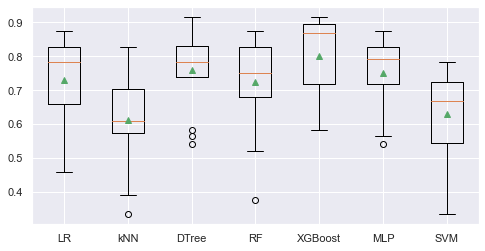

In [103]:
# Obtener un nuevo diagrama de caja y bigotes múltiple de todos los modelos con
# la técnica de submuestreo y/o sobremuestreo que hayas seleccionado, usando los
#  resultados de los conjuntos de validación y con respecto a la métrica que has
# considerado la mejor:



# ************* Inlcuye aquí tu código:******************************

sns.set(rc={'figure.figsize':(8,4)})
databox = [resultados[j][str_mejor_metrica] for j in range(len(resultados))]


plt.boxplot(databox, labels=nombres, showmeans=True)

# *********** Aquí termina la sección de agregar código *************


plt.show()

# **Parte III: Mejor modelo**

## **Ejercicio 18**

### **Selecciona y justifica cuál consideras es el mejor modelo que has obtenido hasta ahora, así como la métrica utilizada. Usando solamente este mejor modelo, busca si puedes mejorar el desempeño haciendo un mejor ajuste de los hiperparámetros y usando la métrica que consideraste la más importante para este problema. Verifica que tu modelo no esté sobreentrenado o subentrenado con dicha métrica.**

### **Incluye tu justificación de cuál consideras es el mejor modelo que has obtenido hasta ahora.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

El mejor modelo para este problema considero que es el de XGBoost. Esto debido a que tiene la mayor accurancy y F1 de entre los otros modelos. Tiene la segunda mayor área bajo la curva y recall. Siendo este último la métrica seleccionada anteriormente. 

### ++++++++ Termina la sección de agregar texto. +++++++++++

In [108]:
# Incluye todo el código que consideres necesario para que con el mejor
# modelo que tienes hasta ahora, puedas mejorar aún un poco más su
# desempeño con respecto a la métrica que estás utilizando:


# ************* Inlcuye aquí tu código:**************************

xgb = XGBClassifier(random_state=42)

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 4, 5],
              'learning_rate': [0.01, 0.1, 0.3],
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.6, 0.8, 1.0],
              'gamma': [0, 0.1, 0.2]}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='recall')

grid_search.fit(Xtv_uosamp, ytv_uosamp)

best_xgb = grid_search.best_estimator_

train_recall = best_xgb.score(Xtv_uosamp, ytv_uosamp)
print("Recall en el conjunto de entrenamiento con los mejores hiperparámetros:", train_recall)

# *********** Aquí termina la sección de agregar código *************

Recall en el conjunto de entrenamiento con los mejores hiperparámetros: 1.0


## **Ejercicio 19**

<Figure size 648x648 with 0 Axes>

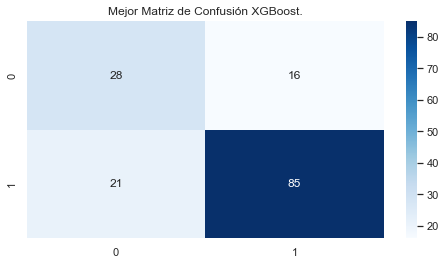

<Figure size 648x648 with 0 Axes>

In [123]:
# Con el mejor modelo y los mejores hiperparámetros encontrados en el ejercicio
# anterior, utiliza ahora (por primera vez en la actividad) el conjunto de
# prueba (test set) para:


# a.	Obtener la matriz de confusión.


# ************* Inlcuye aquí tu código:**************************

y_pred = best_xgb.predict(Xtest)

conf_matrix = confusion_matrix(ytest, y_pred)
cm = pd.DataFrame(data=conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Mejor Matriz de Confusión XGBoost.')
plt.figure(figsize=(9,9))

# *********** Aquí termina la sección de agregar código *************

In [126]:
# b.	El reporte de todas las métricas con el método “classification_report()” de sklearn.


# ************* Inlcuye aquí tu código:**************************

classification_report_val_lr_smote = classification_report(ytest, y_pred)
print("Informe de clasificación XGBoost:")
print(classification_report_val_lr_smote)

# *********** Aquí termina la sección de agregar código *************

Informe de clasificación XGBoost:
              precision    recall  f1-score   support

           0       0.57      0.64      0.60        44
           1       0.84      0.80      0.82       106

    accuracy                           0.75       150
   macro avg       0.71      0.72      0.71       150
weighted avg       0.76      0.75      0.76       150



In [131]:
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

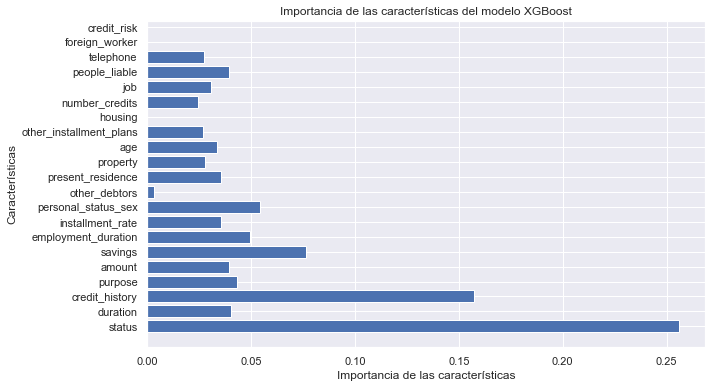

In [143]:
# c.	Realiza un análisis de importancia de variables (feature importance) de
# este mejor modelo con el conjunto de prueba (test), que incluya un gráfico de
# barras con la importancia de los factores. Incluye tus conclusiones al
# respecto y en particular indica si consideras razonables los factores más
# importantes obtenidos.



# ************* Inlcuye aquí tu código:**************************

feature = best_xgb.feature_importances_
feature_names = df.columns.tolist()

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.title('Importancia de las características del modelo XGBoost')
plt.show()

# *********** Aquí termina la sección de agregar código *************

### **Incluye aquí tus comentarios sobre los factores más importantes obtenidos.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Se puede observar que las variables status y credit history son las variables màs importante para el modelo. Esto significa que el estado de la cuenta del deudor en el banco y el historial de contratos de créditos anteriores o actuales sensiblemente afectan el desempeño del modelo.

### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 20**

### **Reporta tus conclusiones finales de la actividad.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

El modelo XGBoost es el mejor modelo ya que tiene la mayor accurancy y F1 de entre los otros modelos. Tiene la segunda mayor área bajo la curva y recall. Siendo este último la métrica seleccionada anteriormente.

De la parte de los features. La importancia del status y credit history resalta la relevancia de la información financiera del deudor para predecir su riesgo crediticio. Esto sugiere que el comportamiento financiero pasado y presente puede ser un indicador crucial para determinar la probabilidad de incumplimiento futuro. De igual forma, los resultados respaldan la idea de que mantener un historial crediticio sólido y una buena gestión de la cuenta bancaria son aspectos clave para reducir el riesgo de incumplimiento. 


### ++++++++ Termina la sección de agregar texto. +++++++++++

>> ### **Fin de la Actividad South German Credit Card.**